#  ![](http://)![](http://)[[](http://)](http://) Mall Customers Analysis

You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

Problem Statement
You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

Columns Description

1. ColumnID      - Unique ID assigned to the customer
2. Gender        - Gender of the Customer
3. Age           - Age of the Customer
4. Annual Income - Annual Income of the Customer
5. Spending Score- Score assigned by the mall based on customer behavior and spending nature

In [ ]:
#for mathematical operations
import numpy as np
import pandas as pd

#for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#for data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#k-means modelling
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# for Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

Reading the dataset

In [ ]:
data = pd.read_csv("../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")

Checking the first five rows of the dataset

In [ ]:
data.head()

Checking the last five rows of the dataset

In [ ]:
data.tail()

In [ ]:
# Shape of the dataset
data.shape
print("There are {} rows and {} columns in the dataset".format(data.shape[0],data.shape[1]))

In [ ]:
data.columns

In [ ]:
data.describe()

In [ ]:
data.describe(include='object')

# Univariate Analysis

Uni means "one", so the analysis of a single variable is called "Univariate Analysis".

In [ ]:
plt.rcParams['figure.figsize'] = (18,6)

#Creating distribution for all the numerical variables at a single place using subplots
plt.subplot(1,3,1)
sns.distplot(data['Age'],color = 'red')
plt.title("Distribution plot of Age", fontsize=16)

plt.subplot(1,3,2)
sns.distplot(data['Annual Income (k$)'], color='blue')
plt.title("Distribution plot of Annual Income (k$)", fontsize=16)

plt.subplot(1,3,3)
sns.distplot(data['Spending Score (1-100)'], color='brown')
plt.title("Distribution plot of Spending Score (1-100)", fontsize=16)

We can infer the following from the distribution plots:-
1. Maximum number of visitors visiting the mall lie in the age group of 20-50 with some variation in between.
2. Most of the people visiting mall have the annual income between around 35-90k dollars.
3. Most of the people visiting mall have the spending score around 40-70.

In [ ]:
plt.rcParams['figure.figsize'] = (16,5)

#Countplot of Age Variable
sns.countplot(data['Age'], color='red')
plt.title("CountPlot of Age", fontsize=16)

There is quite variation in the age of the people visiting the mall.

People of age greater than 50 visit mall lesser than other age group of people.

People below 18 do not visit the mall.

In [ ]:
plt.rcParams['figure.figsize'] = (16,5)

#Countplot of Annual Income
sns.countplot(data['Annual Income (k$)'], color='brown')
plt.title("CountPlot of Annual Income", fontsize=16)

plt.xticks(rotation=90)
plt.show()

It is surprising to know that the maximum annual income of people visiting the mall is 54k or 78k dollars.

In [ ]:
plt.rcParams['figure.figsize'] = (16,5)

#Countplot of Spending Score
sns.countplot(data['Spending Score (1-100)'], color='blue')
plt.title("CountPlot of Spending Score", fontsize=16)

plt.xticks(rotation=90)
plt.show()

Maximum people have spending score around 35-75.

# Checking for Outliers

In [ ]:
plt.rcParams['figure.figsize'] = (18,6)

plt.subplot(1,3,1)
sns.boxplot(data['Age'],color = 'red')
plt.title("Distribution plot of Age", fontsize=16)

plt.subplot(1,3,2)
sns.boxplot(data['Annual Income (k$)'], color='blue')
plt.title("Distribution plot of Annual Income (k$)", fontsize=16)

plt.subplot(1,3,3)
sns.boxplot(data['Spending Score (1-100)'], color='brown')
plt.title("Distribution plot of Spending Score (1-100)", fontsize=16)

 We have a single outliers in the Annual Income Variable. It can be because some or the other person visiting the mall have slightly higher annual income than others.
 So, for now, we would keep the outlier as it as and would see later if this makes any significant effect on the clusters formed.

In [ ]:
plt.rcParams['figure.figsize'] = (12,6)

plt.pie(data['Gender'].value_counts(), labels = ['Female','Male'],autopct = '%.2f%%')
plt.show()

Females are more in number than males visiting the mall. 

# Bivariate Analysis

Bivariate Analysis involves analysis of two variables at a time.

In [ ]:
data.groupby('Gender')['Spending Score (1-100)'].mean()

We can observe that the mean spending score of females is greater than males but that can be because there are more female customers than male.

In [ ]:
sns.scatterplot(x='Spending Score (1-100)', y='Annual Income (k$)', data=data)

We can observe that there seems some clusters forming on the basis of Annual Income and Spending Score of the customers.

In [ ]:
plt.style.use('fivethirtyeight')
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',hue='Age', data=data)

Age has nothing to do with the Spending Score 

In [ ]:
sns.barplot(data['Gender'], data['Annual Income (k$)'])

There is no relationship between the Annual Income and the Gender of the person. Both male and female have almost same annual income.

In [ ]:
sns.barplot(data['Gender'], data['Spending Score (1-100)'])

Spending Score of Females is slightly higher than the spending score of Males.

# Data Processing

Label Encoding is one of the type of encoding techniques which assign a number from 1 to N to all teh categories of the column where N is the number of categories in the variable.

Here, we used Label Encoding for Changing the Categorical feature Gender into Continous feature because it has only two categories Male and Female, so it won't make any difference even if we use One Hot Encoding or any other Encoding Techniques.

In [ ]:
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

In [ ]:
data.head()

Now, the Gender Column is changed to Continous type variable where 1 stands for Male and 0 stands for Female.

# Feature Scaling

Standardization is the process of scaling one or more attributes so that they have a mean value of 0 and a standard deviation of 1.

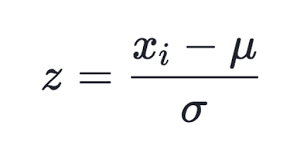

In [ ]:
sc = StandardScaler()

data_sc = sc.fit_transform(data.drop(['CustomerID','Gender'], axis=1))

In [ ]:
data_sc_df = pd.DataFrame(data_sc)

In [ ]:
data_sc_df.columns = ['Age','Annual Income (k$)','Spending Score (1-100)']

In [ ]:
data_ca = data[['CustomerID','Gender']]

In [ ]:
data_sc_new = pd.concat([data_ca,data_sc_df], axis=1)

In [ ]:
data_sc_new.head()

In [ ]:
data_k = data_sc_new[['Age','Annual Income (k$)','Spending Score (1-100)']]

In [ ]:
data_k.head()

## Hopkins Statistics:
The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [ ]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [ ]:
hopkins(data_k)

## Elbow Method

Elbow method is used for finding the optimal number of clusters in the dataset. It runs k-means clustering a number of times and calculate the average score for all clusters where score is the sum of square of distances between each point to its assigned cluster center.

In [ ]:
# elbow-curve/SSD
ssd = []
clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=200)
    kmeans.fit(data_k)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

From the Elbow method, we can observe that the optimal number of clusters are 5. After 5 there is no significant difference in the Sum of Square of differences.

## Silhouette Analysis
It is a measure of how similar are the points to its own data points compared to other clusters.
1. A silhouette score near 1 indicate that the data points are similar to other data points in the cluster.
2. A silhouette score near -1 indicate that the data points are not very similar to the other data points in the cluster.


In [ ]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(data_k)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(data_k, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

In [ ]:
kmeans = KMeans(n_clusters=5, max_iter=200)
kmeans.fit(data_k)

In [ ]:
kmeans.labels_

In [ ]:
data['Cust_ID']  = kmeans.labels_
data.head()

In [ ]:

sns.boxplot(x='Cust_ID', y='Age', data=data)

In [ ]:
sns.boxplot(x='Cust_ID', y='Annual Income (k$)', data=data)

In [ ]:
sns.boxplot(x='Cust_ID', y='Spending Score (1-100)', data=data)

We have clustered the customers into 5 groups.

Cluster 0.  Customers who are around 40-50 years of age having less Annual Income around 20-30k dollars have quite less Spending score.

Cluster 1.  Customers who are around 30-38 years of age having Annual Income around 80-90k dollars have good  Spending Score.

Cluster 2.  Customers who are around 50-65 years of Age having good Annual Income of around 40-60k dollars have moderate spending score around 40-50.

Cluster 3.  Customers who are falling in the age category of 20-30 having good Annual Income and good Spending Score.

Cluster 4.  Customers who are falling in the age category of around 35-55 having good Annual Income but less Spending Score.

Customers falling in the Cluster 1 are most likely to converge while Cluster 2 and Cluster 3 also have good probability of converging.

## Hierarchical Clustering
In hierarchical clustering we do not pre-define the number of clusters but we first visually describe the similarity and dissimilarity between different data points and then decide the appropriate number of clusters.

We visualise the clusters forming in a tree-like structure called Dendrogram.
Linkage is the measure of dissimilarity between clusters having multiple observations.

In [ ]:
link = linkage(data_k, method='complete')
dendrogram(link)
plt.show()

In [ ]:
clusters = cut_tree(link, n_clusters=5)

In [ ]:
clusters.reshape(-1,)

In [ ]:
data['Cust_ID_Hierarchy']  = clusters
data.head()

In [ ]:
sns.boxplot(x='Cust_ID_Hierarchy', y='Spending Score (1-100)', data=data)

In [ ]:
sns.boxplot(x='Cust_ID_Hierarchy', y='Annual Income (k$)', data=data)

In [ ]:
sns.boxplot(x='Cust_ID_Hierarchy', y='Age', data=data)

All the customers are segmented into 5 groups

Cluster 0:- People of age around 20-35 having annual income around 55k dollars have moderate spending score.

Cluster 1:- People of age around 20-28 having annual income less than 30k dollars but much higher spending score.

Cluster 2:- People of age around 50-65 having annual income between 40-60k dollars have moderate spending score.

Cluster 3:- People of age around 30-35 having good income of around 80-90k dollars have good spending score.

Cluster 4:- People of age around 35-45 having annual income of around 80-90k dollars have very less spending score.